## Table of Contents
1. [Introduction](#1.-Introduction)
2. [Assessing the data](#2.-Assessing-the-data)\
     2.1 [Cleaning the data](#2.1-Cleaning-the-data)
3. [Exploratory Analysis](#3.-Exploratory-Analysis)\
    3.1 [Univariate Exploration](#3.1-Univariate-Exploration)\
    3.2 [Bivariate Exploration](#3.2-Bivariate-Exploration)\
    3.3 [Multivariate Exploration](#Multivariate-Exploration)
    

## 1. Introduction

> Importing the needed labraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime 
%matplotlib inline

In [54]:
# reading the csv file
df = pd.read_csv('prosperLoanData.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## 2. Assessing the data

> The dataset consists of 81 columns and 113936 rows, some of this columns will not be used for this analysis. Hence, the needed columns will be extracted accordingly

In [56]:
# extracting the columns needed for exploration analysis
df_1 = df.loc[:, ('Term','LoanOriginationDate','LoanOriginalAmount','LoanStatus','ProsperScore','ProsperRating (Alpha)','MonthlyLoanPayment','BorrowerAPR','EstimatedReturn','LenderYield','IncomeRange','Occupation','EmploymentStatus','IsBorrowerHomeowner','MonthlyLoanPayment','DebtToIncomeRatio','ListingCategory (numeric)')]

In [57]:
# making a copy 
df_loan = df_1.copy()

In [58]:
#checking the data types
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanOriginationDate        113937 non-null  object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ProsperScore               84853 non-null   float64
 5   ProsperRating (Alpha)      84853 non-null   object 
 6   MonthlyLoanPayment         113937 non-null  float64
 7   BorrowerAPR                113912 non-null  float64
 8   EstimatedReturn            84853 non-null   float64
 9   LenderYield                113937 non-null  float64
 10  IncomeRange                113937 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  IsBorrowerHomeowner        11

In [59]:
df_loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [60]:
df_loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [61]:
df_loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

### 2.1 Cleaning the data

> Checking for unique values in the occupation columns

**Test**
> checking the new job categories

In [62]:
df_loan.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [63]:
#renaming the 'other' value to others 
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].replace('Other', 'Others')

In [64]:
#testing the code
df_loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Others            3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [65]:
#filling up the null values in each column appropriately
def null_values(df, col, newvalue): # This function takes three arguments namely: the dataframe, the column and the new value
    for values in col:
        df_loan[col] = df_loan[col].fillna(newvalue)
null_values(df_loan, 'ProsperScore', 0)
null_values(df_loan, 'BorrowerAPR', 0)
null_values(df_loan, 'EmploymentStatus', 'Others')

**Test**
> checking if the null values have been replaced

In [66]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanOriginationDate        113937 non-null  object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ProsperScore               113937 non-null  float64
 5   ProsperRating (Alpha)      84853 non-null   object 
 6   MonthlyLoanPayment         113937 non-null  float64
 7   BorrowerAPR                113937 non-null  float64
 8   EstimatedReturn            84853 non-null   float64
 9   LenderYield                113937 non-null  float64
 10  IncomeRange                113937 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           113937 non-null  object 
 13  IsBorrowerHomeowner        11

In [67]:
#getting rows where Occupation is not NA
df_loan = df_loan[df_loan['Occupation'].notna()]

In [68]:
#converting Properscore to int, since rating should be between 1 - 10
df_loan['ProsperScore'] = df_loan['ProsperScore'].astype(int)

In [69]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110349 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       110349 non-null  int64  
 1   LoanOriginationDate        110349 non-null  object 
 2   LoanOriginalAmount         110349 non-null  int64  
 3   LoanStatus                 110349 non-null  object 
 4   ProsperScore               110349 non-null  int32  
 5   ProsperRating (Alpha)      83520 non-null   object 
 6   MonthlyLoanPayment         110349 non-null  float64
 7   BorrowerAPR                110349 non-null  float64
 8   EstimatedReturn            83520 non-null   float64
 9   LenderYield                110349 non-null  float64
 10  IncomeRange                110349 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           110349 non-null  object 
 13  IsBorrowerHomeowner        11

In [70]:
# checking for duplicate values
sum(df_loan.duplicated())

2

In [71]:
#removing duplicate records
df_loan.drop_duplicates(keep=False, inplace=True)

In [72]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110345 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       110345 non-null  int64  
 1   LoanOriginationDate        110345 non-null  object 
 2   LoanOriginalAmount         110345 non-null  int64  
 3   LoanStatus                 110345 non-null  object 
 4   ProsperScore               110345 non-null  int32  
 5   ProsperRating (Alpha)      83516 non-null   object 
 6   MonthlyLoanPayment         110345 non-null  float64
 7   BorrowerAPR                110345 non-null  float64
 8   EstimatedReturn            83516 non-null   float64
 9   LenderYield                110345 non-null  float64
 10  IncomeRange                110345 non-null  object 
 11  Occupation                 110345 non-null  object 
 12  EmploymentStatus           110345 non-null  object 
 13  IsBorrowerHomeowner        11

In [73]:
df_loan['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [74]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110345 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Term                       110345 non-null  int64         
 1   LoanOriginationDate        110345 non-null  datetime64[ns]
 2   LoanOriginalAmount         110345 non-null  int64         
 3   LoanStatus                 110345 non-null  object        
 4   ProsperScore               110345 non-null  int32         
 5   ProsperRating (Alpha)      83516 non-null   object        
 6   MonthlyLoanPayment         110345 non-null  float64       
 7   BorrowerAPR                110345 non-null  float64       
 8   EstimatedReturn            83516 non-null   float64       
 9   LenderYield                110345 non-null  float64       
 10  IncomeRange                110345 non-null  object        
 11  Occupation                 110345 non-null  object  

In [75]:
df_loan['Year'] = df_loan['LoanOriginationDate'].dt.year

In [76]:
df_loan.sample(5)

,Term,LoanOriginationDate,LoanOriginalAmount,LoanStatus,ProsperScore,ProsperRating (Alpha),MonthlyLoanPayment,BorrowerAPR,EstimatedReturn,LenderYield,IncomeRange,Occupation,EmploymentStatus,IsBorrowerHomeowner,MonthlyLoanPayment,DebtToIncomeRatio,ListingCategory (numeric),Year
71919,12,2011-10-12,7500,Completed,5,E,719.00,0.35843,0.0982,0.2569,"$100,000+",Executive,Employed,False,719.00,0.11,7,2011
31505,36,2010-06-11,3000,Chargedoff,8,B,102.31,0.16005,0.0764,0.1285,"$100,000+",Other,Self-employed,False,102.31,NaN,1,2010
70571,36,2012-10-31,2000,Completed,5,HR,86.85,0.35797,0.1124,0.3077,"$75,000-99,999",Other,Employed,True,86.85,0.25,7,2012
90725,36,2013-12-09,8000,Current,6,B,274.78,0.17969,0.0740,0.1335,"$25,000-49,999",Other,Employed,True,274.78,0.31,1,2013
38116,36,2007-02-20,4000,Completed,0,NaN,131.71,0.12098,NaN,0.1040,Not displayed,Other,Not available,False,131.71,0.35,0,2007


## 3. Exploratory Analysis
> This session involves exploratory analysis to visualise the key variables with the dataset and compare the relationship between varaibles

### 3.1 Univariate Exploration

#### 1. What is the number of borrowers in each occupation category?

In [77]:
base_color = sb.color_palette()[0]

In [78]:
#ordering the occupation
Occupation_order = df_loan['Occupation'].sort_values()

In [79]:
occupation_or = Occupation_order.unique()

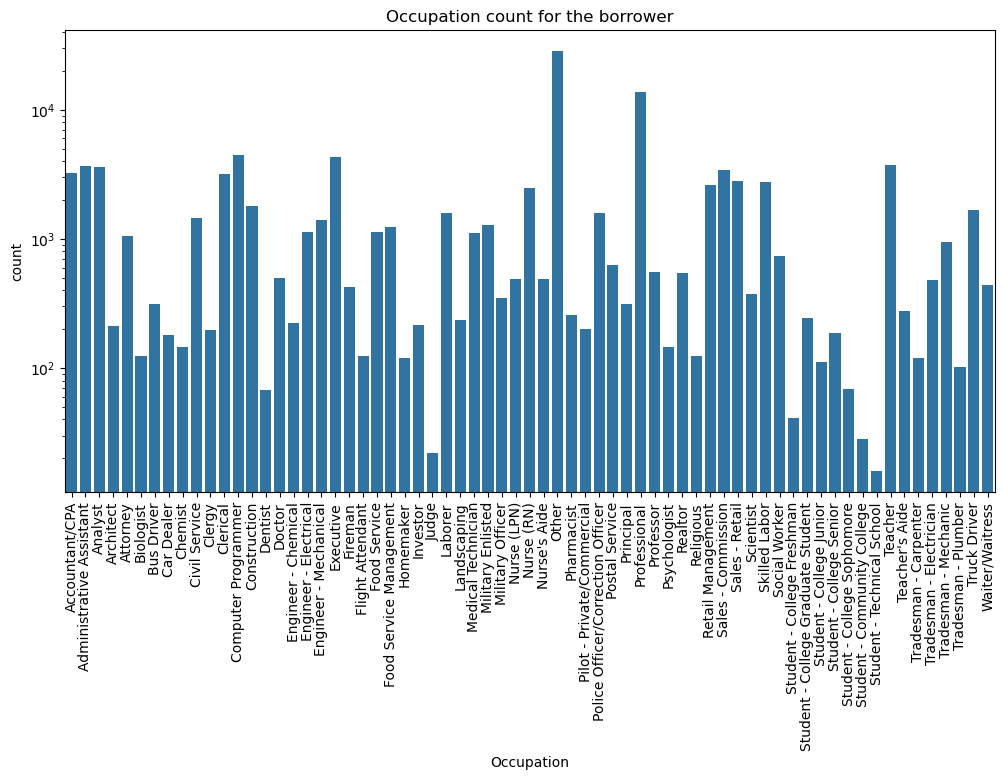

In [81]:
#plot showing distribution of occupation
plt.figure(figsize = [12,6])
g = sb.countplot(data = df_loan, x='Occupation', color = base_color, order = occupation_or )
plt.xticks(rotation = 90)
plt.title('Occupation count for the borrower')
# setting yscale to logrithmic scale
g.set(yscale='log'); 

> In the different occupations selected by borrowers, most were categorized as **others** and **professionals** being in second place. Students in the technical school have the least frequency.

#### 2. What are the different employment status of borrowers?

In [82]:
#ordering the employment status
employment_order = df_loan['EmploymentStatus'].value_counts().index

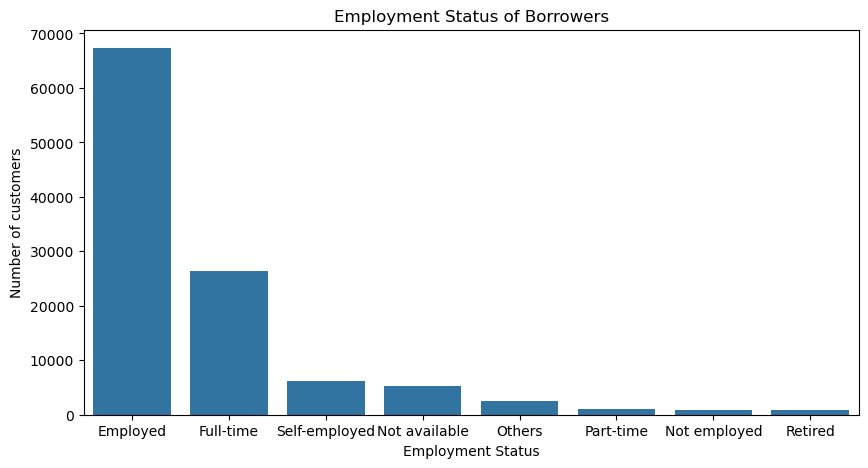

In [84]:
#plot showing distribution of employment status
plt.figure(figsize = (10,5))
sb.countplot(data = df_loan, x = 'EmploymentStatus', color = base_color, order = employment_order)
plt.title('Employment Status of Borrowers')
plt.ylabel('Number of customers')
plt.xlabel('Employment Status');

> Plot showing employment status and frequency, it can be seen that most borrowers are employed

#### 3. Which listing category has the highest frequency?

In [ ]:
#ordering the listing category
list_order = df_loan['ListingCategory (numeric)'].value_counts().index

> The chart below shows the categories of the listing that the borrower selected when posting their listing:\
0 - Not Available, 1 - Debt Consolidation,  2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

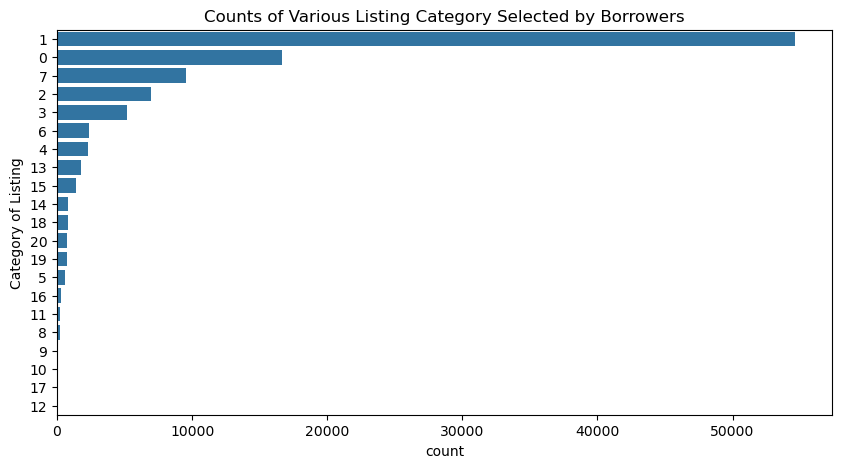

In [482]:
#Listing Category
plt.figure(figsize = (10,5))
sb.countplot(data = df_loan, y='ListingCategory (numeric)', color = base_color, order = list_order)
plt.ylabel('Category of Listing')
plt.title('Counts of Various Listing Category Selected by Borrowers');

> it can be deduced that the major listing category selected by borrrower is for debt consolidation

#### 4. Which income range has the highest number of borrowers?

In [94]:
#ordering the income status
income_order = ['$0', '$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999']

In [97]:
#testing code
income_order

['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999']

Text(0.5, 1.0, 'Income Range of Borrowers')

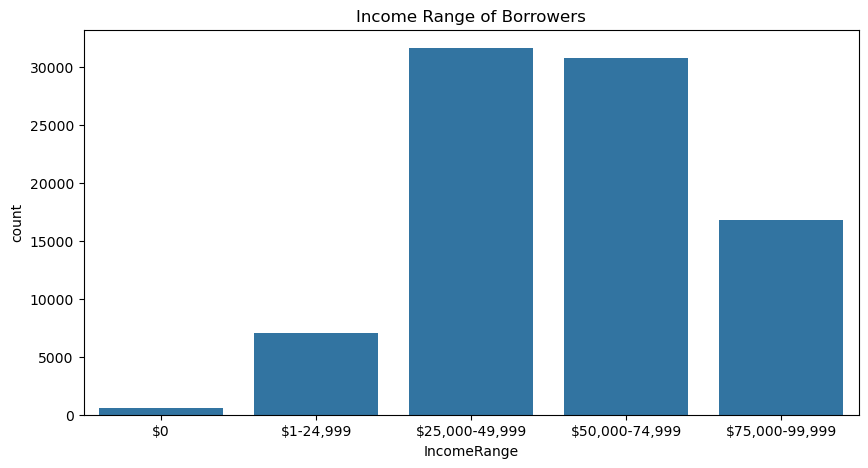

In [99]:
#Income range distribution
plt.figure(figsize = (10,5))
sb.countplot(data = df_loan, x ='IncomeRange', color = base_color, order = income_order)
plt.title('Income Range of Borrowers')
#plt.xticks(rotation = 15);

#### 5. Which loan term has the highest percentage?

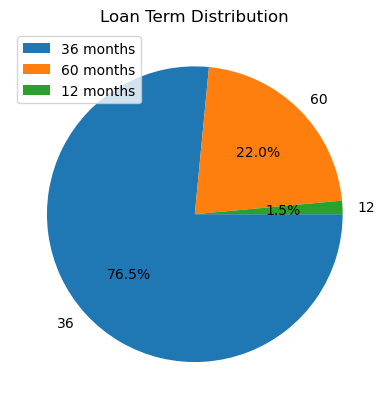

In [102]:
# distribution of loan Term
term_counts = df_loan['Term'].value_counts()
plt.pie(term_counts, labels = term_counts.index, autopct='%1.1f%%',counterclock = False)
legend = ['36 months', '60 months', '12 months']
plt.legend(legend)
plt.title('Loan Term Distribution');

> The pie chart above confirms that 36 months loan term has 76.5% of the total loan

#### 6. What is the percentage of borrowers with home?

In [100]:
# checking if a borrower is a home owner
home_counts = df_loan.IsBorrowerHomeowner.value_counts()

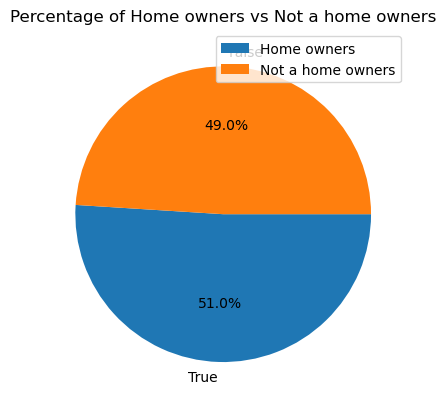

In [101]:
plt.pie(home_counts, labels = home_counts.index, autopct='%1.1f%%',counterclock = False)
legend = ['Home owners', 'Not a home owners']
plt.legend(legend)
plt.title('Percentage of Home owners vs Not a home owners');

> the chart above indicates that 51.0% of borrowers are home owners

#### 7. What is the distribution of the Borrower APR offer by lender?

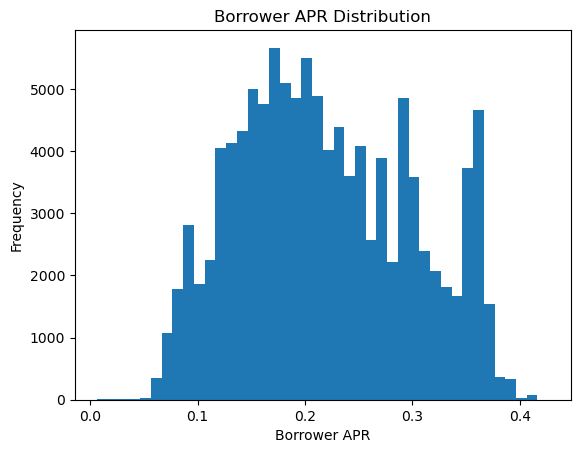

In [103]:
#Histogram showing distribution of Borrower APR
bins = np.arange(df_loan.BorrowerAPR.min(), df_loan.BorrowerAPR.max()+0.01, 0.01)
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Frequency')
plt.title('Borrower APR Distribution');

> Histogram of Borrower APR

#### 8. What is the distribution of the lender yield in the dataset?

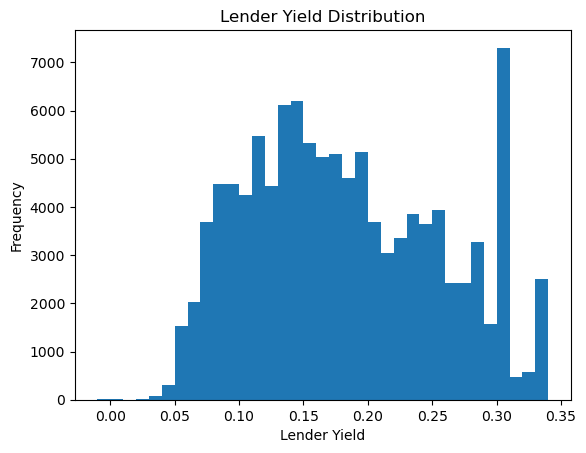

In [104]:
#Histogram showing distribution of Lender Yield
bins = np.arange(df_loan.LenderYield.min(), df_loan.LenderYield.max()+0.01, 0.01)
plt.hist(data = df_loan, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.ylabel('Frequency')
plt.title('Lender Yield Distribution');

#### 9. How is Debt-to-income ratio distributed?

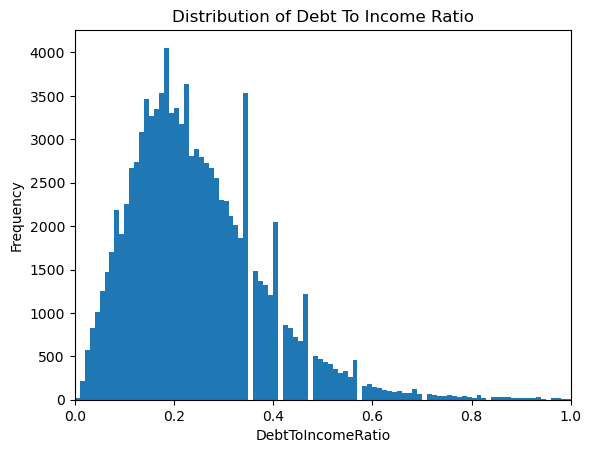

In [105]:
#Histogram showing distribution of Lender Yield
bins = np.arange(df_loan.DebtToIncomeRatio.min(), df_loan.DebtToIncomeRatio.max()+0.01, 0.01)
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Frequency')
# setting the limit for the x axis
plt.xlim(0,1)
plt.title('Distribution of Debt To Income Ratio');

#### 9. Is the Estimated Return for the lender evenly Distributed?

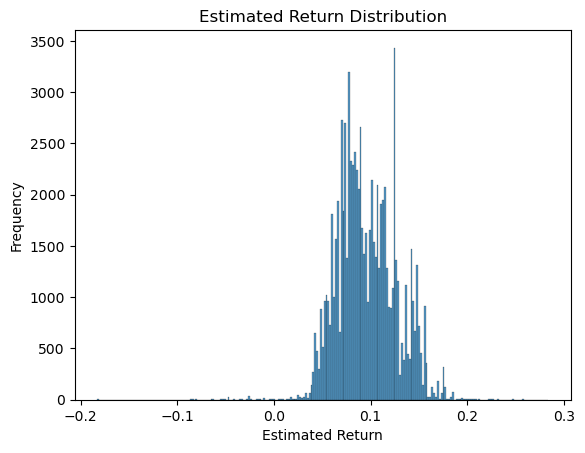

In [106]:
#Histogram showing distribution of Estimated return
sb.histplot(df_loan['EstimatedReturn'])
plt.xlabel('Estimated Return')
plt.ylabel('Frequency')
plt.title('Estimated Return Distribution');

#### 10. Which Prosper score was the highest?

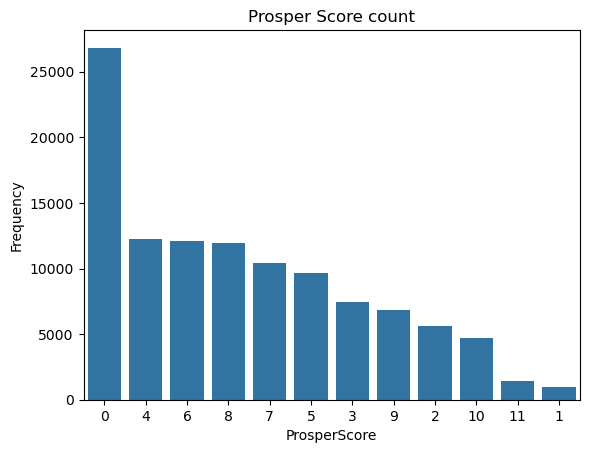

In [107]:
prosper_order = df_loan['ProsperScore'].value_counts().index
sb.countplot(data = df_loan, x = 'ProsperScore', color = base_color, order = prosper_order);
plt.xlabel('ProsperScore')
plt.ylabel('Frequency')
plt.title('Prosper Score count');

> The above plot shows a custom risk score created from Prosper data in the past. The score is on a scale from 1 to 11, with 11 being the best or lowest risk score. Loans that were started after July 2009 are eligible. from the plot above, a lot of prosper score was recorded as 0. This is because no value was recorded before July 2009

### 3.2 Bivariate Exploration

#### 11. What is the relationship between Borrower APR and Lender Yield?

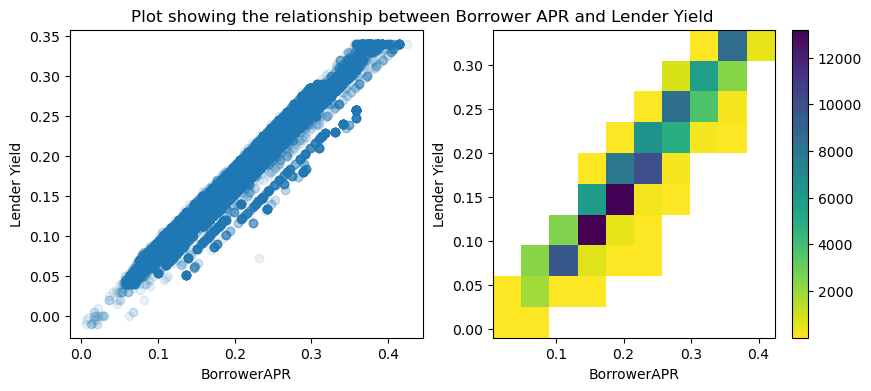

In [108]:
#relationship between Borrower APR and Lender Yield
#plot of the left
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
plt.scatter(data= df_loan, x = 'BorrowerAPR', y = 'LenderYield', alpha=1/10)
plt.xlabel('BorrowerAPR')
plt.ylabel('Lender Yield')

#Plot on the right
plt.title('Plot showing the relationship between Borrower APR and Lender Yield', x= 1)
plt.subplot(1, 2, 2)
h2d = plt.hist2d(data = df_loan, x = 'BorrowerAPR', y = 'LenderYield', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('BorrowerAPR')
plt.ylabel('Lender Yield');

> the scatter plot and heat map show a positive correlation between the borrower APR and lender yield. This indicates that as the APR increases, the lender yield also increase.

 #### 12. Is loan status influenced by the Borrower APR?

In [109]:
#ordering the loanstatus in ascending format
loan_order =df_loan.groupby('LoanStatus')['BorrowerAPR'].sum().sort_values(ascending=True).index

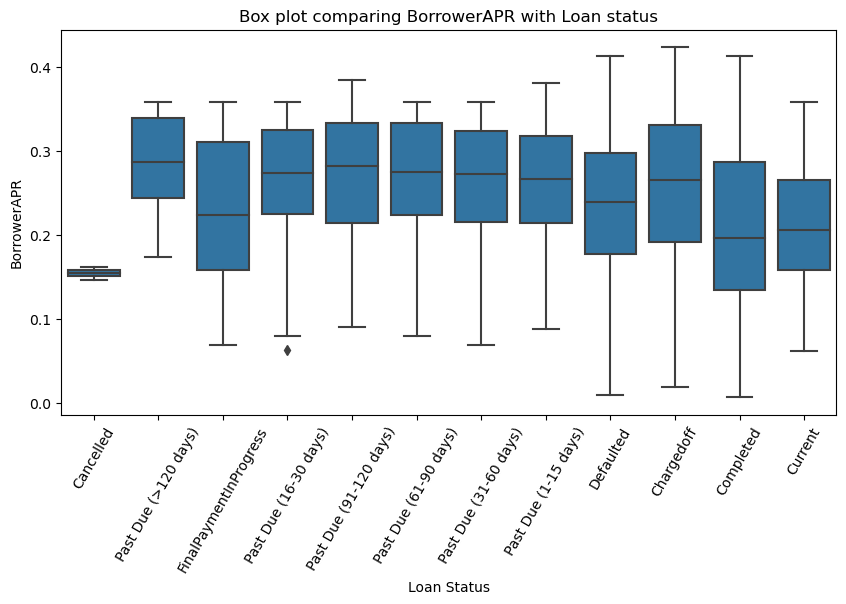

In [110]:
#boxplot comparing the Loan status and Borrower APR
plt.figure(figsize = (10,5))
sb.boxplot(data = df_loan, x ='LoanStatus', y='BorrowerAPR', color=base_color, order = loan_order)
plt.ylabel('BorrowerAPR')
plt.xlabel('Loan Status')
plt.title('Box plot comparing BorrowerAPR with Loan status')
plt.xticks(rotation = 60);

> The boxplot shows relationship between the borrowerAPR and loan status. it appears that loan status past due (91 - 120 days)

### 3.3 Multivariate Exploration

#### 13. What is the correlation between the numerical variables in the dataset?

In [111]:
#getting all numerical variables in the dataset
numeric_variables = df_loan.select_dtypes(include = 'number').columns

In [112]:
#testing
numeric_variables

Index(['Term', 'LoanOriginalAmount', 'ProsperScore', 'MonthlyLoanPayment',
       'BorrowerAPR', 'EstimatedReturn', 'LenderYield', 'MonthlyLoanPayment',
       'DebtToIncomeRatio', 'ListingCategory (numeric)', 'Year'],
      dtype='object')

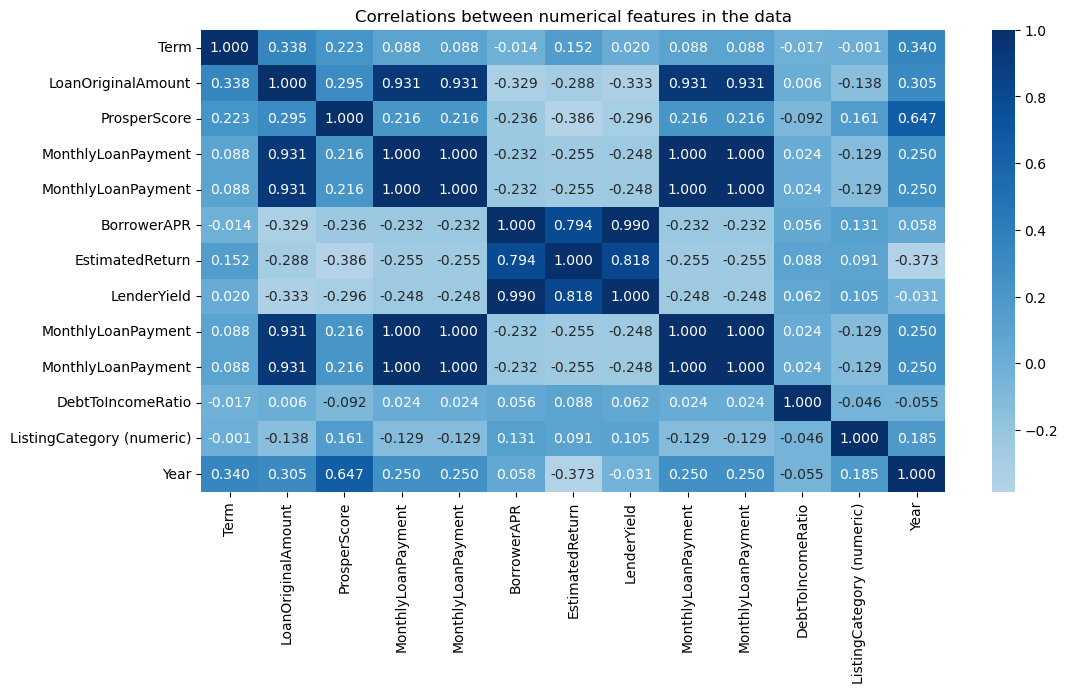

In [113]:
#Heatmap showing the correlation between all numerical variable
plt.figure(figsize = [12, 6])
sb.heatmap(df_loan[numeric_variables].corr(), annot = True, fmt = '.3f', cmap = 'Blues', center = 0)
plt.title('Correlations between numerical features in the data');

> The correlation matrix below was done to compare the relation between numerical variables in the dataset. The co-efficient varies from +1 through 0 to -1. It can be deduced that lender yield and borrower APR have a high positive correlation.

#### 14. What is the relationship between the Borrower APR and Prosper rating for across each loan term?

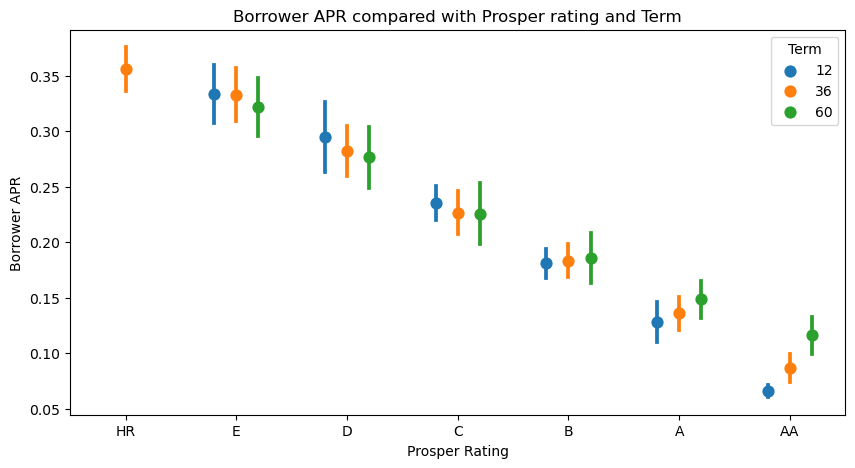

In [114]:
#pointplot comparing borrower APR with prosper rating and Term
plt.figure(figsize = [10,5])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR',
             order = ['HR','E','D','C','B','A','AA'], hue = 'Term', linestyles = '', dodge = 0.4, errorbar ='sd')
plt.title('Borrower APR compared with Prosper rating and Term')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR');

#### 15. How does the Borrower APR change across the year for each loan term?

In [116]:
df_loan.Year.unique()

array([2007, 2014, 2012, 2013, 2006, 2010, 2011, 2008, 2009], dtype=int64)

Text(0, 0.5, 'Borrower APR')

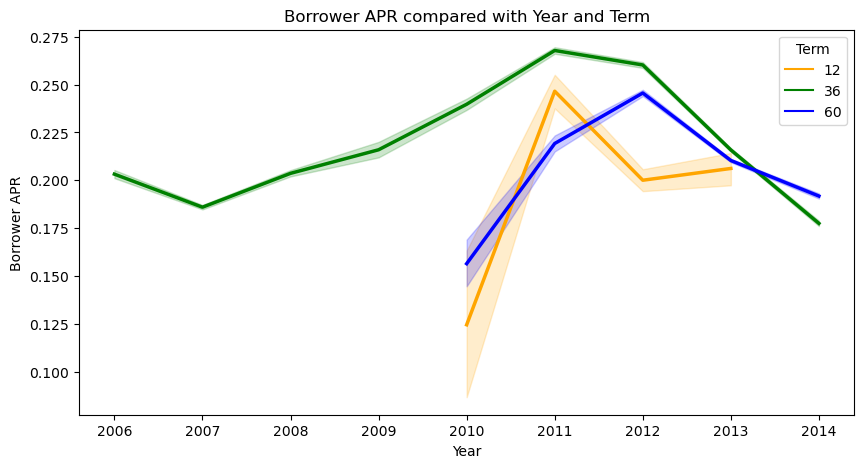

In [117]:
plt.figure(figsize = [10,5])
sb.lineplot(data = df_loan, x = 'Year', y = 'BorrowerAPR', hue = 'Term', palette=['orange', 'g', 'b'],  markers=True, linewidth=2.5)
plt.title('Borrower APR compared with Year and Term')
plt.xlabel('Year')
plt.ylabel('Borrower APR')

> The line plot shows the distribution of borrower APR across the year for each term. Borrower APR was highest in 2011 for 12 and 36-month terms. and in 2012, 60 months loan term had the highest APR. SImilarly, the APR appears to be reducing since 2012 for the three loan terms, with the lowest point for 36 months at 0.175.

In [120]:
#Savings to file
df_loan.to_csv('loan_data.csv', index = False)